In [8]:
import numpy as np
import pickle
from data_generator.batch_generator import BatchGenerator
import data_generator.batch_generator_functions as bgf
from utils.util_functions import convert_float_to_binary_mask
from utils.util_functions import convert_mask_to_cup_format
from model.metric_functions.cup_f1_score import cup_f1_score
import pandas as pd

BUG_DATA = "data"

In [9]:
BATCH_SIZE = 32
LENGTH = 1024
SAMPLE_OFFSET = 0
SAMPLE_FREQ = 512
CENTER = 512
CENTER_OFFSET = 256
IGNORE = ['zeros_ts']

In [10]:
with open(BUG_DATA + "//X_test.pickle", "rb") as file:
    X_test = pickle.load(file)

with open(BUG_DATA + "//y_test.pickle", "rb") as file:
    y_test = pickle.load(file)

with open(BUG_DATA + "//y_pred.pickle", "rb") as file:
    y_pred = pickle.load(file)

with open(BUG_DATA + "//batch_table.pickle", "rb") as file:
    batch_table = pickle.load(file)

with open(BUG_DATA + "//ignore_xsv.pickle", "rb") as file:
    ignore_xsv = pickle.load(file)

<AxesSubplot:>

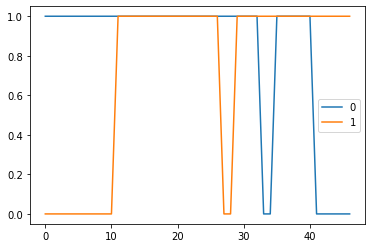

In [11]:
"""
batches_true = np.array([
    [[0, 0, 0, 1, 1, 1, 0, 0], [1, 1, 0, 0, 1, 1, 0, 0]],
    [[1, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 1, 1, 0, 1]],
    [[1, 1, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
])
"""
ts_true = bgf.convert_batches_to_ts(data=y_test, batch_table=batch_table, center=CENTER, center_offset=CENTER_OFFSET, ignore=[ignore_xsv])
ts_true_df = pd.DataFrame(ts_true)
ts_true_df.plot()

<AxesSubplot:>

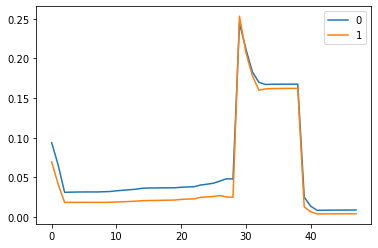

In [4]:
ts_pred = bgf.convert_batches_to_ts(data=y_pred, batch_table=batch_table, center=CENTER, center_offset=CENTER_OFFSET, ignore=IGNORE)
ts_pred_df = pd.DataFrame(ts_pred)
ts_pred_df.plot()

In [9]:
bin_arr = convert_float_to_binary_mask(ts_pred[1])
bin_arr

array([0., 0.], dtype=float32)

In [10]:
convert_mask_to_cup_format(bin_arr)

[]

In [5]:
cup_f1_score(y_pred=ts_pred, y_true=ts_true)

NameError: name 'ts_true' is not defined

In [ ]:
mat = np.array([[3, 3], [8, 9], [12, 13]])
mat

array([[ 3,  3],
       [ 8,  9],
       [12, 13]])

In [ ]:
mat[~(mat[:, 0] == mat[:, 1])]

array([[ 8,  9],
       [12, 13]])